# Imports:

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor

# Loading the Data

In [ ]:
!wget https://media.githubusercontent.com/media/ulissigroup/F22-06-325/main/f22-06-325/projects/wildfires/data/BlodgettCombinedBlobTable.csv

In [ ]:
# define column names
col_names = ["Unused tags 1", "BlobID1", "Unused tags 2", 
            "1D Retention Time (min)", "2D Retention Time (sec)", 
            "Peak Height", "Peak Volume", "Peak volume/nearest internal standard peak volume", 
            "Calculated d-alkane retention index", "matched retention index", 
            "Unused tags 3", "Unused tags 4", "Unused tags 5", 
            "BlobID_2", "Filter number", "Unused tags 6", 
            "Mass concentration of compound (ng/m3)"]

# import csv file
df_blobtable = pd.read_csv("BlodgettCombinedBlobTable.csv", names = col_names)

unusedtags = ["Unused tags 1", "Unused tags 2", "Unused tags 3", 
                "Unused tags 4", "Unused tags 5", "Unused tags 6"]

# dropping the NaNs
df_blobtable.replace(np.inf, np.nan, inplace = True)
df_blobtable = df_blobtable.drop(labels = unusedtags, axis = 1)
df_blobtable = df_blobtable.dropna()

In [ ]:
df_shrub = pd.read_excel("data/All_ShrubCovOnly_01_16.xlsx", sheet_name = "16")

df_shrub

# Creating a Binary Representation Column of the Drone's Elevation:
0 if the drone is on the ground, 1 if it is in the air

In [ ]:
# create a binary representation of if the drones are elevated or on the ground
binary = []

# convert the column to an array
filters = np.array(df_blobtable['Filter number'])

for filter in filters:
  if filter >= 200:
    binary.append(0)
  else:
    binary.append(1)

# create a new column
df_blobtable['Binary Elevation'] = binary

# Creating an Altitude Column:

In [ ]:
# create a new altitude column for if the drones are elevated or on the ground
alt = []

# convert the column to an array
filters = np.array(df_blobtable['Filter number'])

for filter in filters:
  if filter == 1:
    alt.append(50)
  elif filter == 2:
    alt.append(53)
  elif filter == 3:
    alt.append(41)
  elif filter == 4:
    alt.append(14)
  elif filter == 5:
    alt.append(50)
  elif filter == 6:
    alt.append(40)
  elif filter == 7:
    alt.append(32)
  elif filter == 8:
    alt.append(35)
  elif filter == 9:
    alt.append(50)
  elif filter == 10:
    alt.append(20)
  elif filter == 11:
    alt.append(35)
  elif filter == 12:
    alt.append(30)
  elif filter == 13:
    alt.append(20)
  elif filter == 14:
    alt.append(70)
  elif filter == 15:
    alt.append(95)
  elif filter == 16:
    alt.append(100)
  elif filter == 17:
    alt.append(100)
  elif filter == 18:
    alt.append(72)
  elif filter == 19:
    alt.append(70)
  elif filter == 20:
    alt.append(60)
  elif filter == 21:
    alt.append(60)
  elif filter == 22:
    alt.append(60)
  else:
    alt.append(0)

# create a new column
df_blobtable['Altitude'] = alt

# Creating a Plot Column:

In [ ]:
# create a new plot number column 
plot = []

# convert the column to an array
filters = np.array(df_blobtable['Filter number'])

for filter in filters:
  if filter == 1:
    plot.append(340)
  elif filter == 2:
    plot.append(340)
  elif filter == 3:
    plot.append(340)
  elif filter == 4:
    plot.append(340)
  elif filter == 5:
    plot.append(60)
  elif filter == 6:
    plot.append(60)
  elif filter == 7:
    plot.append(60)
  elif filter == 8:
    plot.append(60)
  elif filter == 9:
    plot.append(0)
  elif filter == 10:
    plot.append(60)
  elif filter == 11:
    plot.append(60)
  elif filter == 12:
    plot.append(60)
  elif filter == 13:
    plot.append(60)
  elif filter == 14:
    plot.append(400)
  elif filter == 15:
    plot.append(400)
  elif filter == 16:
    plot.append(400)
  elif filter == 17:
    plot.append(400)
  elif filter == 18:
    plot.append(400)
  elif filter == 19:
    plot.append(400)
  elif filter == 20:
    plot.append(400)
  elif filter == 21:
    plot.append(400)
  elif filter == 22:
    plot.append(400)
  elif filter == 201:
    plot.append(340)
  elif filter == 202:
    plot.append(340)
  elif filter == 203:
    plot.append(340)
  elif filter == 203:
    plot.append(340)
  elif filter == 204:
    plot.append(340)
  elif filter == 205:
    plot.append(340)
  elif filter == 212:
    plot.append(340)
  elif filter == 207:
    plot.append(340)
  elif filter == 208:
    plot.append(340)
  elif filter == 209:
    plot.append(340)
  elif filter == 210:
    plot.append(340)
  elif filter == 211:
    plot.append(340)
  elif filter == 213:
    plot.append(60)
  elif filter == 214:
    plot.append(60)
  elif filter == 215:
    plot.append(60)
  elif filter == 216:
    plot.append(60)
  elif filter == 217:
    plot.append(60)
  elif filter == 218:
    plot.append(60)
  elif filter == 219:
    plot.append(60)
  elif filter == 220:
    plot.append(60)
  elif filter == 221:
    plot.append(60)
  elif filter == 222:
    plot.append(60)
  elif filter == 223:
    plot.append(60)
  elif filter == 224:
    plot.append(60)
  elif filter == 225:
    plot.append(400)
  elif filter == 226:
    plot.append(400)
  elif filter == 227:
    plot.append(400)
  elif filter == 228:
    plot.append(400)
  elif filter == 229:
    plot.append(400)
  elif filter == 230:
    plot.append(400)
  elif filter == 231:
    plot.append(400)
  elif filter == 232:
    plot.append(400)
  elif filter == 233:
    plot.append(400)
  elif filter == 234:
    plot.append(400)
  elif filter == 235:
    plot.append(400)
  elif filter == 236:
    plot.append(400)
  elif filter == 237:
    plot.append(400)
  else:
    plot.append(0)  # there are filter numbers that don't have one of the above filter numbers
    
# create a new column
df_blobtable['Plot'] = plot

# Adding Columns from the All_ShrubCovOnly_01_16.xlsx Sheet 16:

In [16]:
filter_number = np.array(df_blobtable['Filter number'])
plot_number = np.array(df_blobtable['Plot'])

# initialize new columns in the data frame
Unit = np.array(df_blobtable['Plot'])*0
StandID = np.array(df_blobtable['Plot'])*0
Pcover = np.array(df_blobtable['Plot'])*0
Aveht = np.array(df_blobtable['Plot'])*0


plot_length = len(plot_number)
shrub_plot_length = len(df_shrub['Plot'])

for i in range(plot_length):
    for ii in range(shrub_plot_length):
        if filter_number[i] == df_shrub['Plot'][ii]:
            Unit[i] = df_shrub['Unit'][ii]
            StandID[i] = df_shrub['StandID'][ii]
            Pcover[i] = df_shrub['Pcover'][ii]
            Aveht[i] = df_shrub['Aveht'][ii]
            
df_blobtable['Unit'] = Unit
df_blobtable['StandID'] = StandID
df_blobtable['Aveht'] = Aveht
df_blobtable['Pcover'] = Pcover

df_blobtable

,BlobID1,1D Retention Time (min),2D Retention Time (sec),Peak Height,Peak Volume,Peak volume/nearest internal standard peak volume,Calculated d-alkane retention index,matched retention index,BlobID_2,Filter number,Mass concentration of compound (ng/m3),Binary Elevation,Altitude,Plot,Unit,StandID,Aveht,Pcover
0,181,40.608204,1.026330,105.022469,1263.347317,1.000000,1652.439024,1653.0,0,201,0.000000,0,0,340,0,0,0,0
1,1553,40.037744,1.414941,31.052483,479.394947,1.000000,1634.146341,1633.0,0,201,0.000000,0,0,340,0,0,0,0
2,62,63.502673,1.135938,8.124082,135.140907,1.000000,2524.561404,2520.0,0,201,0.000000,0,0,340,0,0,0,0
3,776,27.259436,1.355154,281.546460,3376.619472,1.000000,1263.387978,1277.0,0,201,0.000000,0,0,340,0,0,0,0
4,61,32.013271,0.328824,118.679093,946.665804,1.000000,1400.000000,1800.0,0,201,0.000000,0,0,340,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,2811,40.312724,0.981316,4.096229,57.013969,0.019236,1644.171779,1646.0,176,9,0.783983,1,50,0,590,5909,0,0
44636,2812,40.274506,1.131518,155.203347,1839.028248,0.620461,1642.944785,1642.0,176,9,160.803335,1,50,0,590,5909,0,0
44637,2813,40.045199,0.891195,201.872901,2958.995344,0.998322,1635.582822,1637.0,176,9,24.473803,1,50,0,590,5909,0,0
44638,2818,45.892543,0.931249,6.134070,124.792845,0.043840,1825.675676,1824.0,176,9,1.330786,1,50,0,590,5909,0,0


#  Data Train/Val/Test Split
This split is performed on the df_blobtable with Unit, StandID, Aveht, and Pcover added.

In [18]:
# creating the train/val/test split 
# 80/10/10
# removing the columns used to determine the elevation of the drone
x = df_blobtable.drop(['Altitude', 'Binary Elevation', 'Filter number'], axis = 1)
y = df_blobtable[('Altitude')]

# performing a 80/10/10 split
x_train, x_testval, y_train, y_testval, = train_test_split(
x, y, train_size = 8/10, random_state = 42, shuffle = True)

x_val, x_test, y_val, y_test = train_test_split(
x_testval, y_testval, test_size = 5/10, random_state = 42, shuffle = True)

# Models:

Logistic Regression Model to Predict Altitudes:

The validation MAE for a simple logistic regression model is: 4.802


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



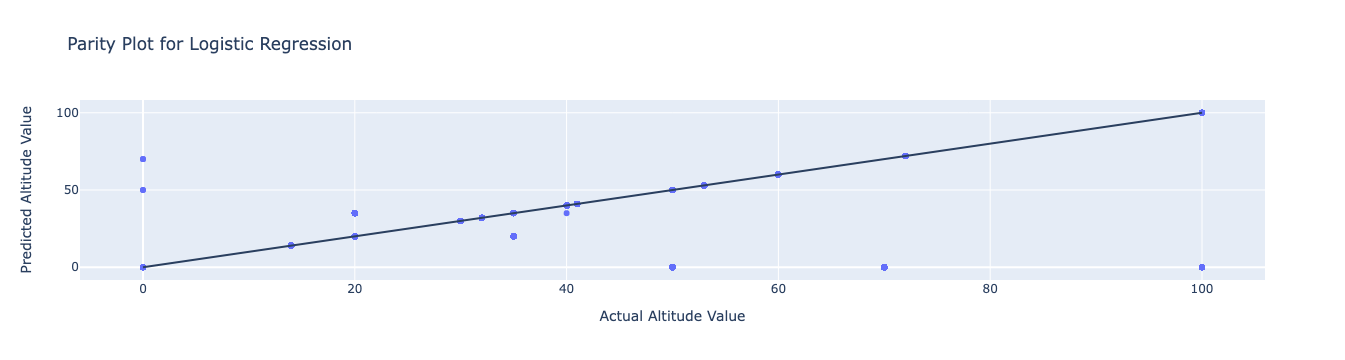

In [24]:
# simple logistic regression
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression(penalty = "none"))
logistic_regression.fit(x_train, y_train)
log_mae = mean_absolute_error(y_val, logistic_regression.predict(x_val))
print('The validation MAE for a simple logistic regression model is:', round(log_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = logistic_regression.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Altitude Value")
fig.update_yaxes(title_text = "Predicted Altitude Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Logistic Regression', autosize = True)
fig.show()

Logistic Regression Model with 3rd Order Polynomial Features to Predict Altitudes:

The validation MAE for a logistic regression model with 3rd order features is: 4.718


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



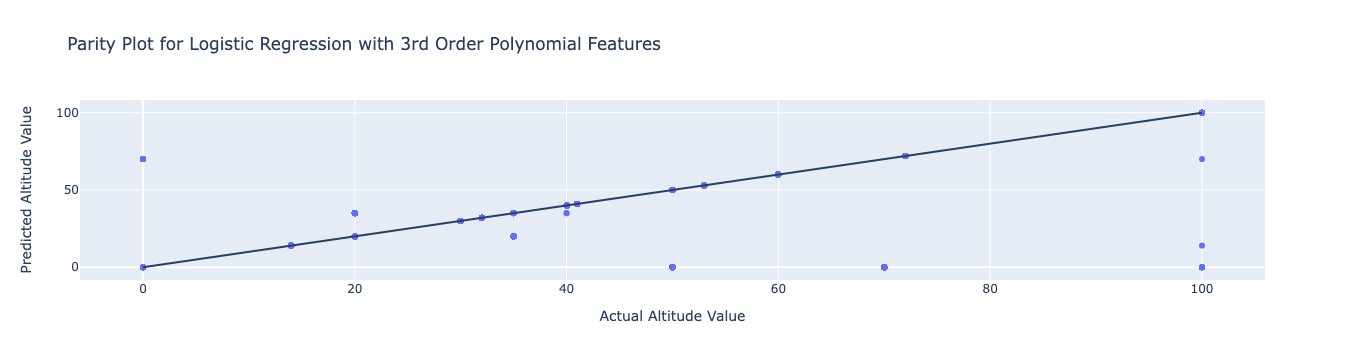

In [27]:
log_regress_poly = make_pipeline(PolynomialFeatures(3), StandardScaler(), LogisticRegression(penalty = "none"))
log_regress_poly.fit(x_train, y_train)
log_mae_poly = mean_absolute_error(y_val, log_regress_poly.predict(x_val))
print('The validation MAE for a logistic regression model with 3rd order features is:', round(log_mae_poly, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = log_regress_poly.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Altitude Value")
fig.update_yaxes(title_text = "Predicted Altitude Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Logistic Regression with 3rd Order Polynomial Features', autosize = True)
fig.show()

Default Decision Tree Regressor to Predict Altitudes:

The MAE for the default decision tree regressor is: 5.939


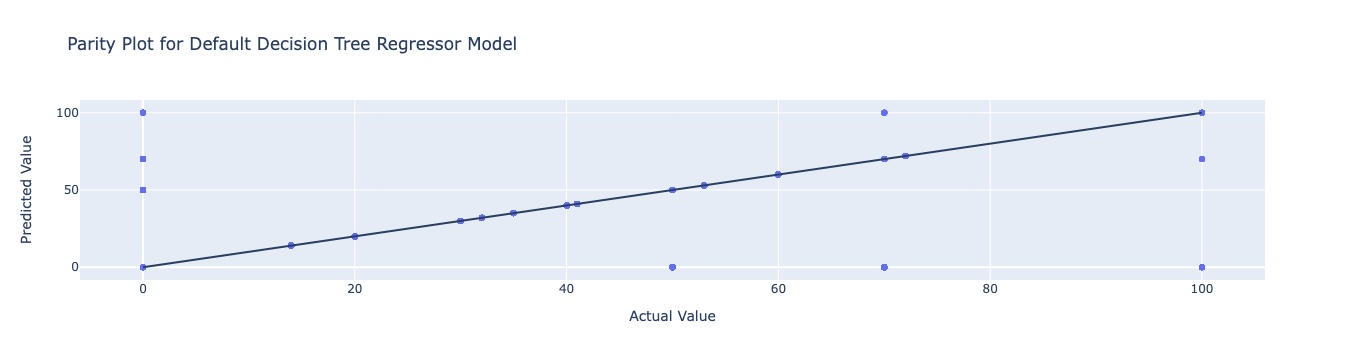

In [26]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

dt_mae = mean_absolute_error(y_val, dt_model.predict(x_val))
print('The MAE for the default decision tree regressor is:', round(dt_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = dt_model.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max(),)

fig.update_xaxes(title_text = "Actual Value")
fig.update_yaxes(title_text = "Predicted Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Default Decision Tree Regressor Model', autosize = True)
fig.show()

Decision Tree Regressor with Standard Scaler to Predict Altitudes:

The MAE for the decision tree regressor with standard scaler features is: 6.163


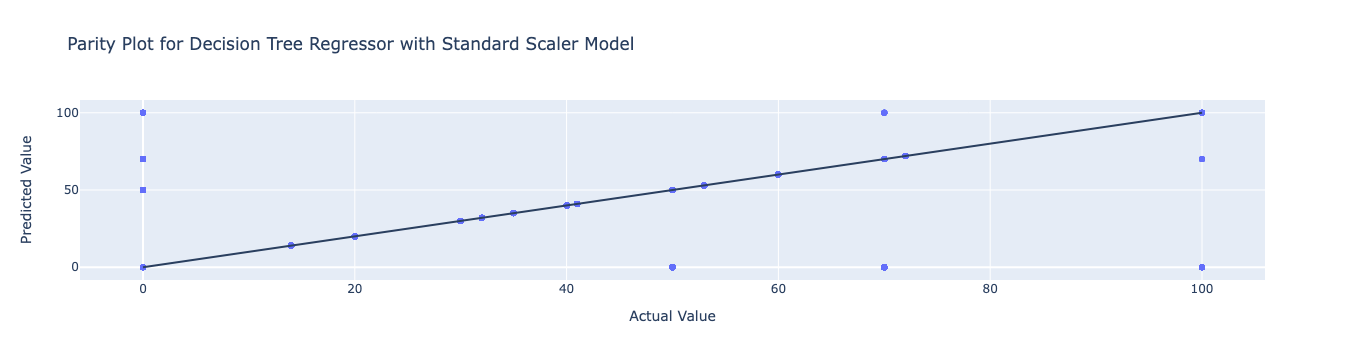

In [23]:
dtp_model = DecisionTreeRegressor()
dtp_model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
dtp_model.fit(x_train, y_train)

dtp_mae = mean_absolute_error(y_val, dtp_model.predict(x_val))
print('The MAE for the decision tree regressor with standard scaler features is:', round(dtp_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = dtp_model.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max(),)

fig.update_xaxes(title_text = "Actual Value")
fig.update_yaxes(title_text = "Predicted Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Decision Tree Regressor with Standard Scaler Model', autosize = True)
fig.show()

# Important Features for Decision Tree Regressor:
For the new data frame, it can be seen that StandID and Plot are the most important features for the decision tree regressor. 

In [28]:
importances = dt_model.feature_importances_

# code from: https://stackoverflow.com/questions/23900080/how-are-feature-importances-ordered-in-scikit-learns-randomforestregressor
sorted(zip(x, importances), reverse = True)

[('matched retention index', 0.014867938276558553),
 ('Unit', 0.0059980204604528475),
 ('StandID', 0.41021540801554407),
 ('Plot', 0.20975608317656003),
 ('Peak volume/nearest internal standard peak volume', 0.047573013386434784),
 ('Peak Volume', 0.0511822294672291),
 ('Peak Height', 0.042589770819597604),
 ('Pcover', 0.00025155300209218386),
 ('Mass concentration of compound (ng/m3)', 0.058122904651289414),
 ('Calculated d-alkane retention index', 0.01818715919329448),
 ('BlobID_2', 0.01813256137195222),
 ('BlobID1', 0.035346664581312484),
 ('Aveht', 0.012202205909505014),
 ('2D Retention Time (sec)', 0.04820143880948419),
 ('1D Retention Time (min)', 0.02737304887869303)]

In [29]:
# extracts the decision tree regressor from the pipeline
# code from: https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
importances = dtp_model.steps[1][1].feature_importances_

# code from: https://stackoverflow.com/questions/23900080/how-are-feature-importances-ordered-in-scikit-learns-randomforestregressor
sorted(zip(x, importances), reverse = True)

[('matched retention index', 0.014978867719710388),
 ('Unit', 0.025830808650936923),
 ('StandID', 0.38807240685605754),
 ('Plot', 0.20975608317656005),
 ('Peak volume/nearest internal standard peak volume', 0.047130758084735457),
 ('Peak Volume', 0.04689703482173674),
 ('Peak Height', 0.04651205911103972),
 ('Pcover', 0.00023816613870610088),
 ('Mass concentration of compound (ng/m3)', 0.05797043696214564),
 ('Calculated d-alkane retention index', 0.016699616080209676),
 ('BlobID_2', 0.017710660050973114),
 ('BlobID1', 0.035907694984020945),
 ('Aveht', 0.014525805741893646),
 ('2D Retention Time (sec)', 0.04864344608604353),
 ('1D Retention Time (min)', 0.0291261555352307)]

KNeighbors to Predict Altitudes:

The MAE for KNeighbors with 5 neighbors and Standard Scaler is: 6.856


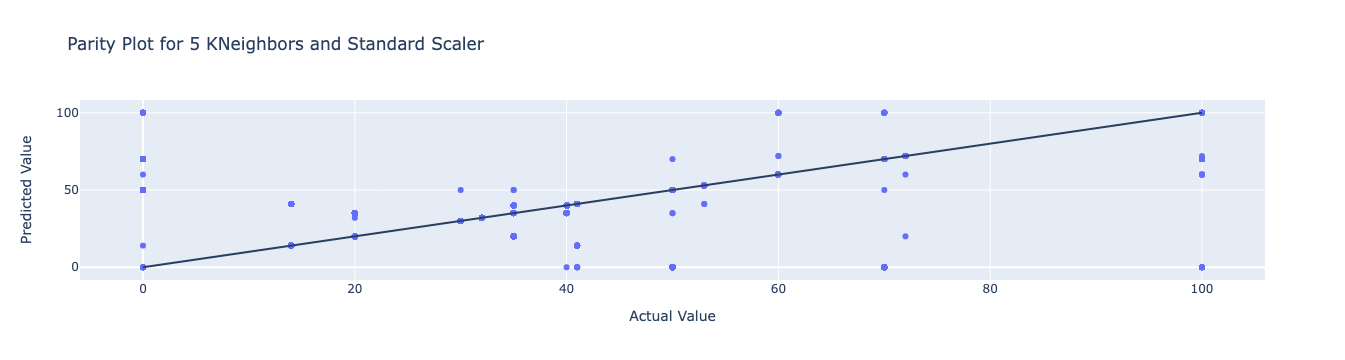

In [32]:
model_k = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 1))
model_k.fit(x_train, y_train)
k_mae = mean_absolute_error(y_val, model_k.predict(x_val))
print('The MAE for KNeighbors with 5 neighbors and Standard Scaler is:', round(k_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = model_k.predict(x_val), mode = "markers")])

fig.add_shape(
    type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Value")
fig.update_yaxes(title_text = "Predicted Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for 5 KNeighbors and Standard Scaler', autosize = True)
fig.show()